# Bivariate analysis

In [ ]:

import pandas as pd                # For dataframe handling
import numpy as np                 # For matrix and list computations
import matplotlib.pyplot as plt    # For advanced graphs
from locale import normalize       # For computing proportions

In [ ]:
wbr = pd.read_excel ('/content/wbr_data.xlsx') # Your bath to file here
# And make a quick preview
wbr


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp_celsius,windspeed_kh,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,Cloudy,14.110847,10.749882,0.363625,80.5833,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,Cloudy,14.902598,16.652113,0.353739,69.6087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,Sunny,8.050924,16.636703,0.189405,43.7273,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,Sunny,8.200000,10.739832,0.212122,59.0435,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,Sunny,9.305237,12.522300,0.229270,43.6957,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,Cloudy,10.420847,23.458911,0.226642,65.2917,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,Cloudy,10.386653,10.416557,0.255046,59.0000,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,Cloudy,10.386653,8.333661,0.242400,75.2917,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,Sunny,10.489153,23.500518,0.231700,48.3333,364,1432,1796


# we use correleation to study 2 cuantitatives variables --->  **cuantitative variable * cuantitative variable = CORELATION**

Analysis:


*   Graphically: scatterplot
*   Numerically: Pearson


Simpre ubicamos:
1.  la variable independiente o predictora = EJE X
2.  la variable dependiende = EJE Y


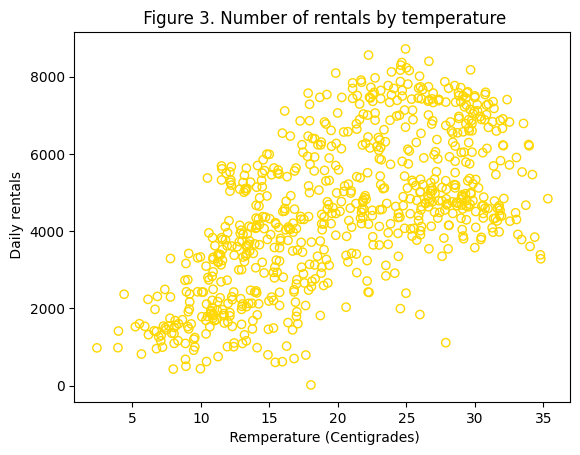

In [ ]:
#Basic scatterplot
plt.scatter (wbr.temp_celsius, wbr.cnt, facecolors='none', edgecolor='gold')
plt.ylabel(' Daily rentals')
plt.xlabel(' Remperature (Centigrades)')
plt.title (' Figure 3. Number of rentals by temperature')

plt.show ()

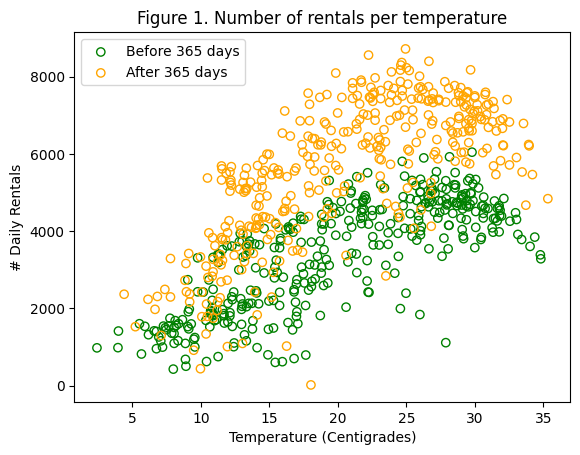

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que wbr.temp_celsius y wbr.cnt son las listas de temperaturas y números de alquiler respectivamente

# Supongamos también que tienes una lista llamada days con la cantidad de días que quieres marcar con un color diferente
dias_limite = 365

# Separar los datos antes y después de 365 días
temp_celsius_before = [temp for i, temp in enumerate(wbr.temp_celsius) if i < dias_limite]
cnt_before = [cnt for i, cnt in enumerate(wbr.cnt) if i < dias_limite]

temp_celsius_after = [temp for i, temp in enumerate(wbr.temp_celsius) if i >= dias_limite]
cnt_after = [cnt for i, cnt in enumerate(wbr.cnt) if i >= dias_limite]

# Graficar los datos antes de 365 días en un color y después de 365 días en otro color
plt.scatter(temp_celsius_before, cnt_before, facecolors='none', edgecolor='green', label='Before 365 days')
plt.scatter(temp_celsius_after, cnt_after, facecolors='none', edgecolor='orange', label='After 365 days')

plt.ylabel('# Daily Rentals')
plt.xlabel('Temperature (Centigrades)')
plt.title('Figure 1. Number of rentals per temperature')
plt.legend()  # Agregar leyenda
plt.show()


We have strong correlation, and we need to cuantife degree of asociation between those two variables.
Pearson puede tomar valores entre -1 y +1.


*   -1 = correlacion inversa perfecta
*  0 = ausencia de relación
* -1 = correcion directa perfecta

In our case, is on of the most strongest graphics seen. And we calculate it by:




In [ ]:
from scipy.stats import pearsonr

# Assuming `wbr` is your DataFrame and contains the columns `temp_celsius` and `cnt`
correlation_coefficient, p_value = pearsonr(wbr['temp_celsius'], wbr['cnt'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Pearson correlation coefficient: 0.6274940090334921
P-value: 2.81062239758937e-81


And so, there is correlation imp as 0.62 is a strong numer as it is close to 1. There is a big variation, but margin of error is a small. We can predicate for a future week.



The chief officer defents that temperature has impact on rentals. In order to test this assumption, we took a sample and we found the "fiigure 1." --- formalize the problem and test the affirmation of the chief.

formalize = set Ho and H1 ---  Rechazamos Ho pq Pvalue es menor q 0,05

and the sustantive interpretation -- W 95% confidence there is direct association between rental and temperature.

# ANOVA

In [ ]:
wbr.groupby('weathersit').cnt.describe()

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
Cloudy,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0
Rainy,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0
Sunny,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0


array([[<Axes: title={'center': 'Cloudy'}>,
        <Axes: title={'center': 'Rainy'}>],
       [<Axes: title={'center': 'Sunny'}>, <Axes: >]], dtype=object)

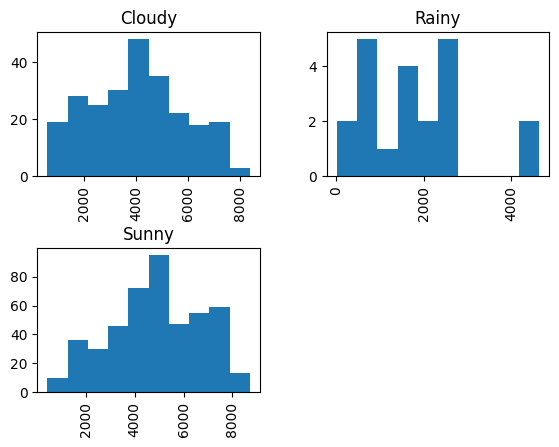

In [ ]:
#Check normality
wbr.hist(column='cnt', by='weathersit')

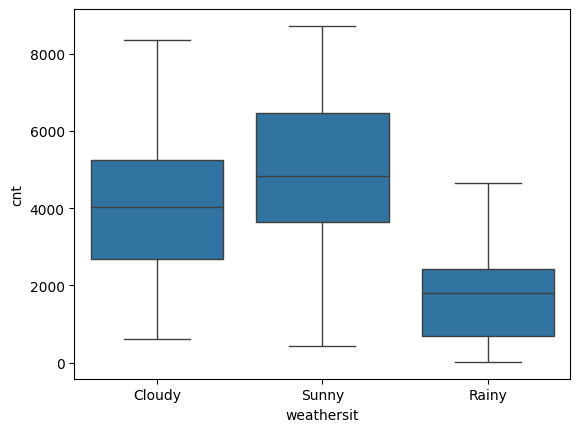

In [ ]:
import seaborn as sns
g=sns.boxplot(x="weathersit",y="cnt", data=wbr)
plt.show()